In [ ]:
!cp  drive/MyDrive/НИР/dataset_bert.py .
!cp  drive/MyDrive/НИР/functions_for_bert.py .


In [ ]:
!pip install transformers
!pip install torch

     |████████████████████████████████| 3.4 MB 5.4 MB/s 
     |████████████████████████████████| 895 kB 51.0 MB/s 
     |████████████████████████████████| 3.3 MB 36.9 MB/s 
     |████████████████████████████████| 596 kB 53.4 MB/s 
     |████████████████████████████████| 67 kB 4.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from dataset_bert import CustomDataset
from functions_for_bert import Classifier

In [ ]:
!pip3 install deeppavlov
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

     |████████████████████████████████| 880 kB 5.4 MB/s 
     |████████████████████████████████| 654 kB 43.6 MB/s 
     |████████████████████████████████| 10.4 MB 42.0 MB/s 
     |████████████████████████████████| 76 kB 4.7 MB/s 
     |████████████████████████████████| 8.2 MB 20.3 MB/s 
     |████████████████████████████████| 7.3 MB 24.2 MB/s 
     |████████████████████████████████| 859 kB 50.4 MB/s 
     |████████████████████████████████| 40 kB 21 kB/s 
     |████████████████████████████████| 510 kB 49.6 MB/s 
     |████████████████████████████████| 1.5 MB 46.3 MB/s 
     |████████████████████████████████| 53 kB 2.4 MB/s 
     |████████████████████████████████| 2.9 MB 38.5 MB/s 
     |████████████████████████████████| 6.7 MB 37.1 MB/s 
     |████████████████████████████████| 3.8 MB 50.8 MB/s 
     |████████████████████████████████| 46 kB 3.8 MB/s 
     |████████████████████████████████| 2.1 MB 41.3 MB/s 
     |████████████████████████████████| 65 kB 4.0 MB/s 
     |███████████████████

In [ ]:
from transformers import DistilBertTokenizer
from transformers import DistilBertForSequenceClassification

#device = 'cuda'

tokenizer_path = 'distilbert-base-multilingual-cased'
tokenizer = DistilBertTokenizer.from_pretrained(tokenizer_path)

model_path = 'distilbert-base-multilingual-cased'
model = DistilBertForSequenceClassification.from_pretrained(model_path)

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/517M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-multilingual-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'pre_classifie

In [ ]:
import torch

out_features = 768

classifier_MB = Classifier(
    model,
    tokenizer,
    out_features,
    6
)


In [ ]:
from deeppavlov.dataset_readers.basic_classification_reader import BasicClassificationDatasetReader
from deeppavlov.dataset_iterators.basic_classification_iterator import BasicClassificationDatasetIterator

dr = BasicClassificationDatasetReader().read(
    data_path='/content/drive/MyDrive/НИР',
    train='Join_dataset.csv',
    x = 'text',
    y = 'news'
)

train_iterator = BasicClassificationDatasetIterator(
    data=dr,
    field_to_split='train',  # field that will be splitted
    split_fields=['train', 'valid', 'test'],   # fields to which the fiald above will be splitted
    split_proportions=[0.7, 0.2, 0.1],  #proportions for splitting
    split_seed=23,  # seed for splitting dataset
    seed=42)  # seed for iteration over dataset

2022-01-14 11:32:50.859 WARNING in 'deeppavlov.dataset_readers.basic_classification_reader'['basic_classification_reader'] at line 112: Cannot find /content/drive/MyDrive/НИР/valid.csv file
2022-01-14 11:32:50.863 WARNING in 'deeppavlov.dataset_readers.basic_classification_reader'['basic_classification_reader'] at line 112: Cannot find /content/drive/MyDrive/НИР/test.csv file
2022-01-14 11:32:50.865 INFO in 'deeppavlov.dataset_iterators.basic_classification_iterator'['basic_classification_iterator'] at line 74: Splitting field <<train>> to new fields <<['train', 'valid', 'test']>>


In [ ]:
x_train, y_train = train_iterator.get_instances(data_type='train')

x_valid, y_valid = train_iterator.get_instances(data_type='valid')

x_test, y_test = train_iterator.get_instances(data_type='test')

print('train: ')
for x, y in list(zip(x_train, y_train))[:3]:
   print('x:', x)
   print('y:', y)
   print('=================')

print('validation: ')
for x, y in list(zip(x_valid, y_valid))[:3]:
   print('x:', x)
   print('y:', y)
   print('=================')

train: 
x: Наташа Королева и Тарзан впервые показались вместе после измены мужа 
y: 1
x: Следствие вспомнило про убитых журналистов
y: 1
x: Острову дали свободы
y: 1
validation: 
x: Польшу обвинили в смерти президента
y: 1
x: «Нетс» проиграли кумирам Прохорова
y: 1
x: Иогана Ебать, земля тебе пухом, братишка. Этот ебаный унылый никчемный тупорылый копрославный куколд.

y: 0


In [ ]:
classifier_MB.preparation(x_train, y_train, x_valid, y_valid)

In [ ]:
all_valid_loss = []
all_train_loss = []
all_valid_acc = []
all_train_acc = []

all_valid_loss, all_valid_acc, all_train_loss, all_train_acc = classifier_MB.train('multilingual.pth')

Epoch 1/4
Train loss 0.13926420613314883 accuracy 0.9742857142857143
Val loss 0.07579363666035352 accuracy 0.9865
----------
Epoch 2/4
Train loss 0.042114929775032575 accuracy 0.9924285714285715
Val loss 0.07731144410805063 accuracy 0.988
----------
Epoch 3/4
Train loss 0.013382465515154634 accuracy 0.9981428571428572
Val loss 0.09840552996235306 accuracy 0.987
----------
Epoch 4/4
Train loss 0.002922140163303019 accuracy 0.9992857142857143
Val loss 0.11493027765436636 accuracy 0.9875
----------


In [ ]:
predictions = [str(classifier_MB.predict(t)) for t in x_test]

In [ ]:
precision, recall, f1score = precision_recall_fscore_support(y_test, predictions)[:3]

print(f'precision: {precision}, recall: {recall}, f1score: {f1score}')

precision: [0.98792757 0.98011928], recall: [0.98003992 0.98797595], f1score: [0.98396794 0.98403194]


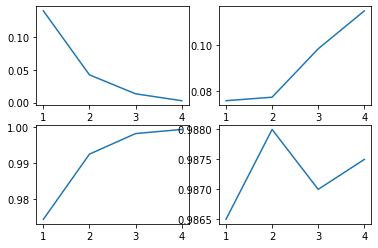

In [ ]:
import matplotlib.pyplot as plt 

fig, axs = plt.subplots(2, 2)
axs[0][0].plot([1,2,3,4], all_train_loss)
axs[0][1].plot([1,2,3,4], all_valid_loss)
axs[1][0].plot([1,2,3,4], all_train_acc)
axs[1][1].plot([1,2,3,4], all_valid_acc)